# Module 1: Fundamentals of ML - Intro to SciKit Learn

## Key Types of ML problems

**Supervised** ML: learn to pedict **target values** from labelled data.
- Classification (target values are discrete classes)
- Regression (target values are continuous values)


**Unsupervised** ML: finding useful structure or knowledge in data when no labels are available
- Finding clusters of similar users (clustering)
- Detecting abnormal server access patterns (unsupervised outlier detection)

### Basic ML Workflow: 
**Representation -> Evaluation -> Optimization**

## Python Tools for ML

**1. Classical ML**
- Scikit-Learn
- Statsmodels

**2. Deep Learning Frameworks**
- TensorFlow
- Keras
- PyTorch
- JAX
- Flax
- MXNet
- Theano (legacy)

**3. Gradient Boosting/Numerical Computing**
- XGBoost
- LightGBM
- CatBoost

**4. Data Handling/Numerical Computing**
- NumPy
- Pandas
- SciPy
- Dask
- Vaex
- Polars

**5. Visualization/Plotting**
- Matplotlib
- Seaborn
- Plotly
- graphviz
- Bokeh
- Altair
- ggplot (plotnine)

**6. Natural Language Processing (NLP)**
- NLTK
- spaCy
- Gensim
- HuggingFace Transoformers
- SentenceTransformers
- fuzzywuzzy

**7. Computer Vision**
- OpenCV
- Pillow (PIL)
- scikit-image
- torchvision
- albumentations
- mediapipe

**8. Reinforcement Learning**
- Stable Baselines3
- OpenAI Gym
- RLlib

**9. Audio/Speech ML**
- Librosa
- torchaudio

**10. Explainable AI (XAI)**
- SHAP
- LIME
- Eli5

**11. Deployment/Serving**
- Flask
- FastAPI
- Streamlit
- Gradio
- ONNX Runtime
- TensorFlow Serving
- TorchServe

**12. Experiment Tracking/Monitoring**
- MLflow
- Weights & Biases (wandb)
- TensorBoard
- Neptune.ai

**13. Data Versioning/Pipelines/Orchestration**
- DVC
- Airflow
- Prefect
- Luigi

**14. Feature Engineering**
- Featuretools
- tsfresh



In [66]:
%matplotlib widget
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path

In [67]:
data = Path('assets') / 'fruit_data_with_colors.txt'
fruits = pd.read_table(data)
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [68]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [69]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Examining the Data

In [70]:
#pd.__version__

<Figure size 1066.67x800 with 0 Axes>

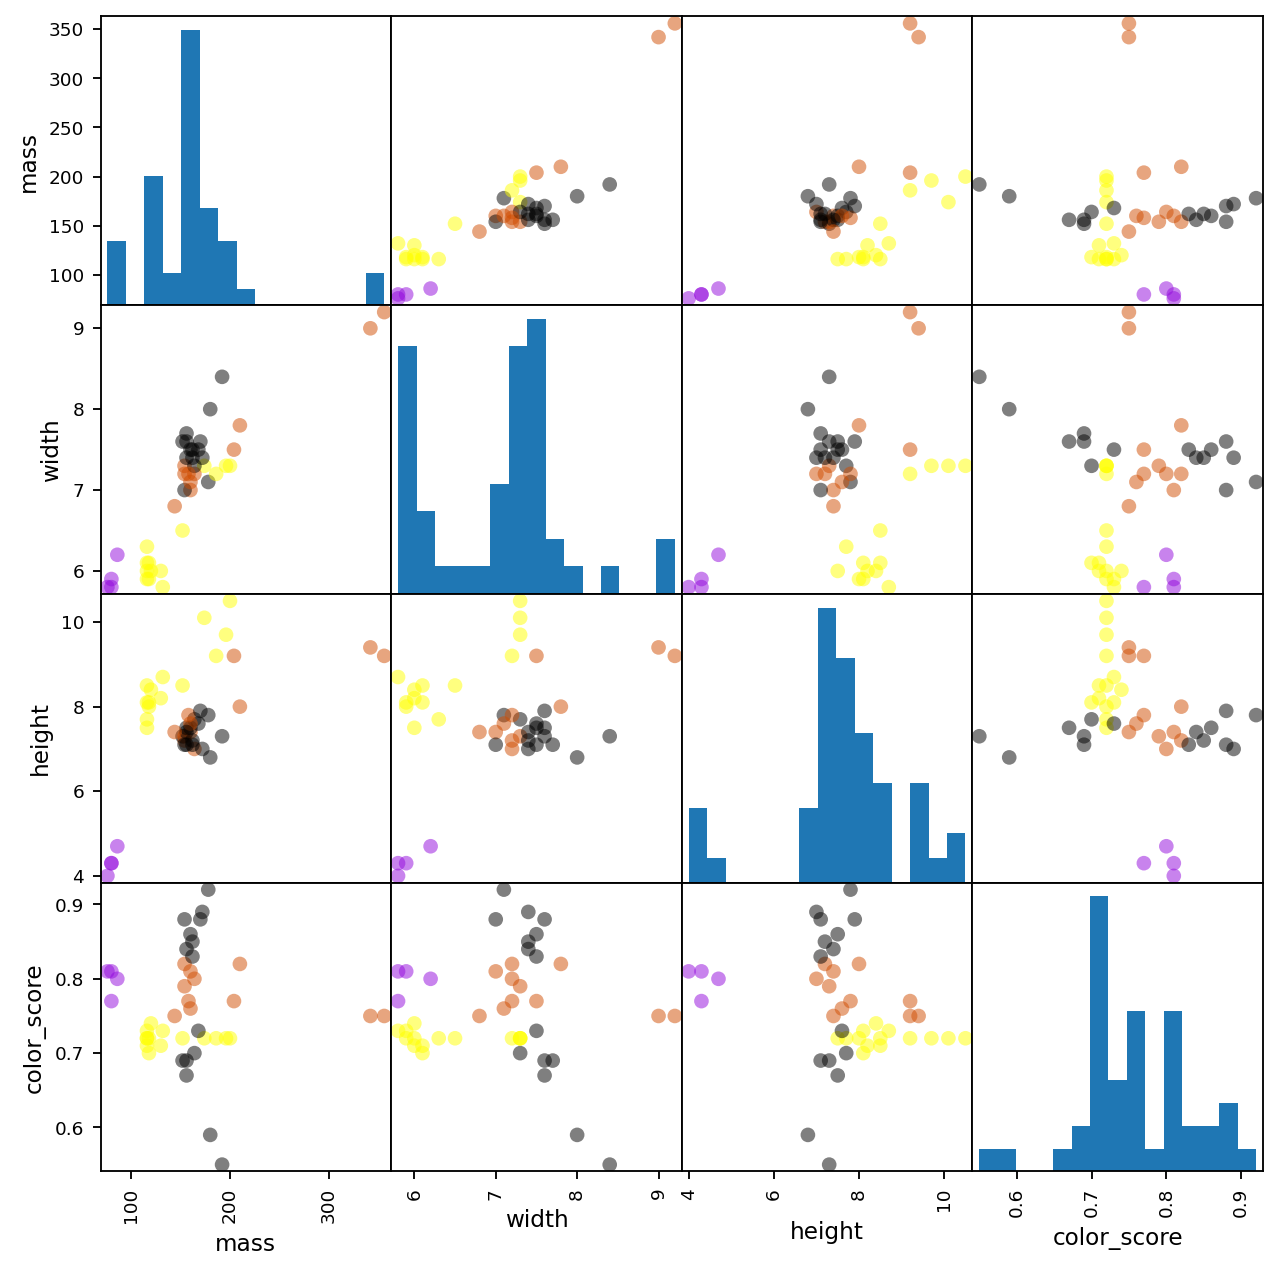

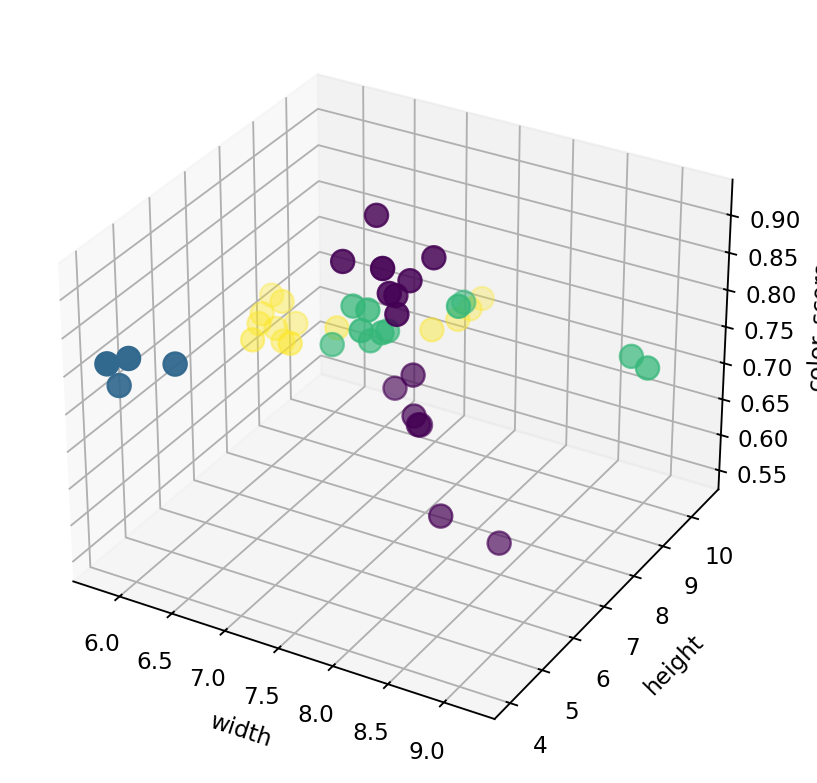

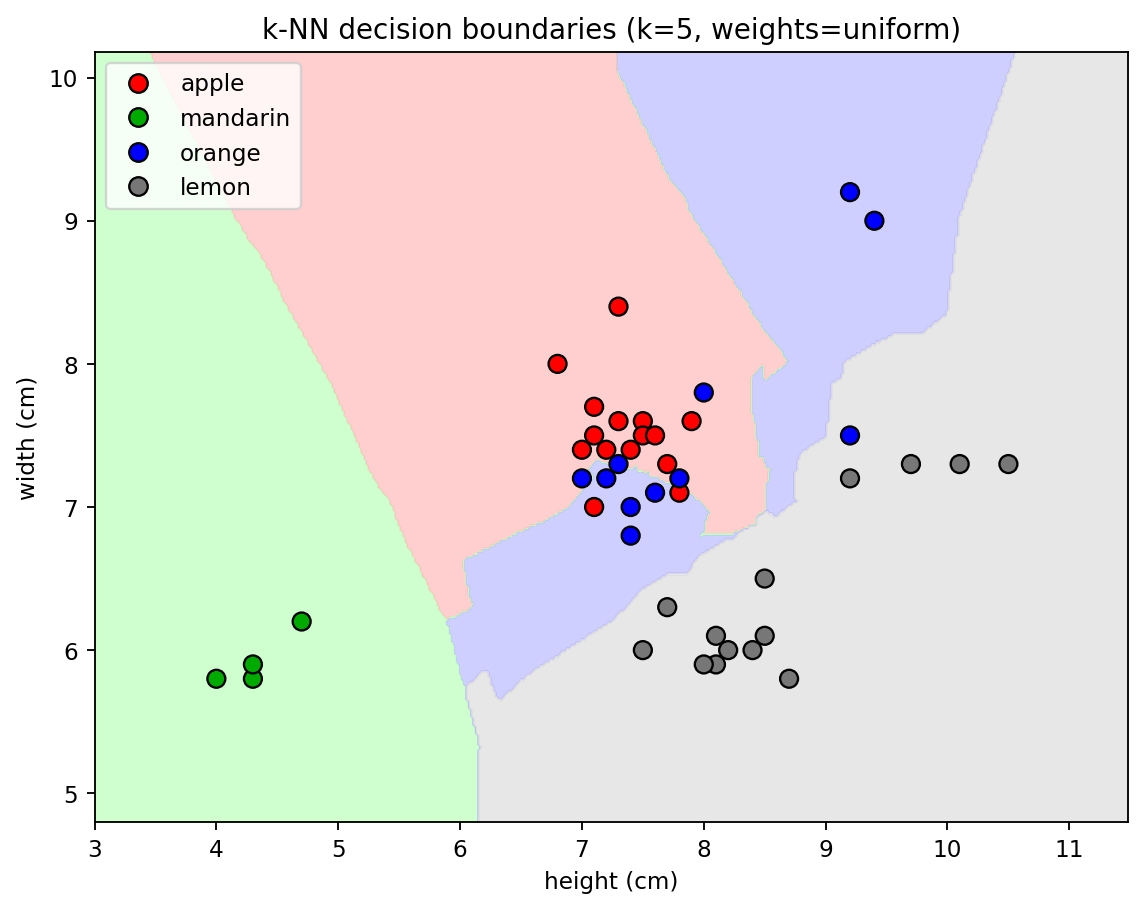

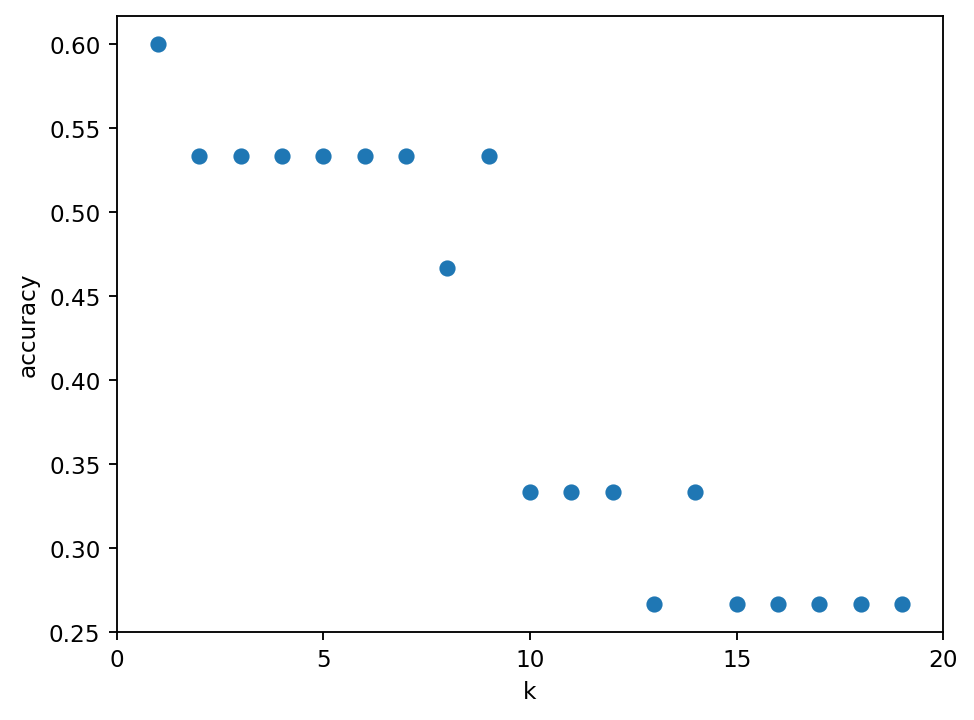

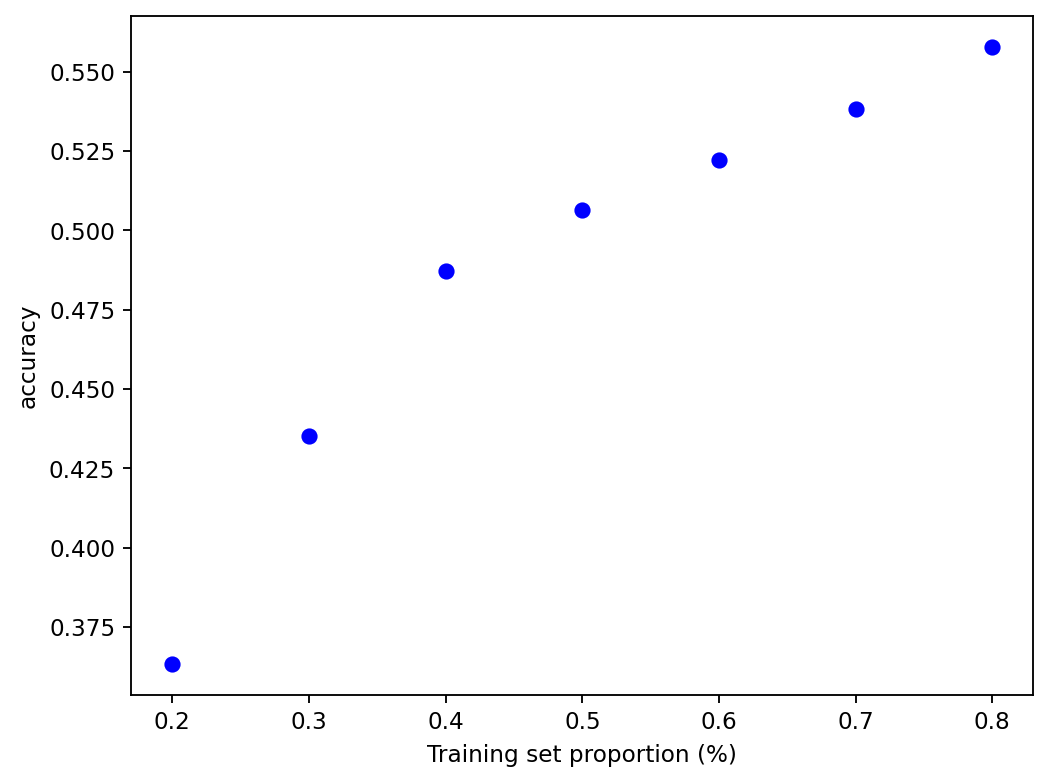

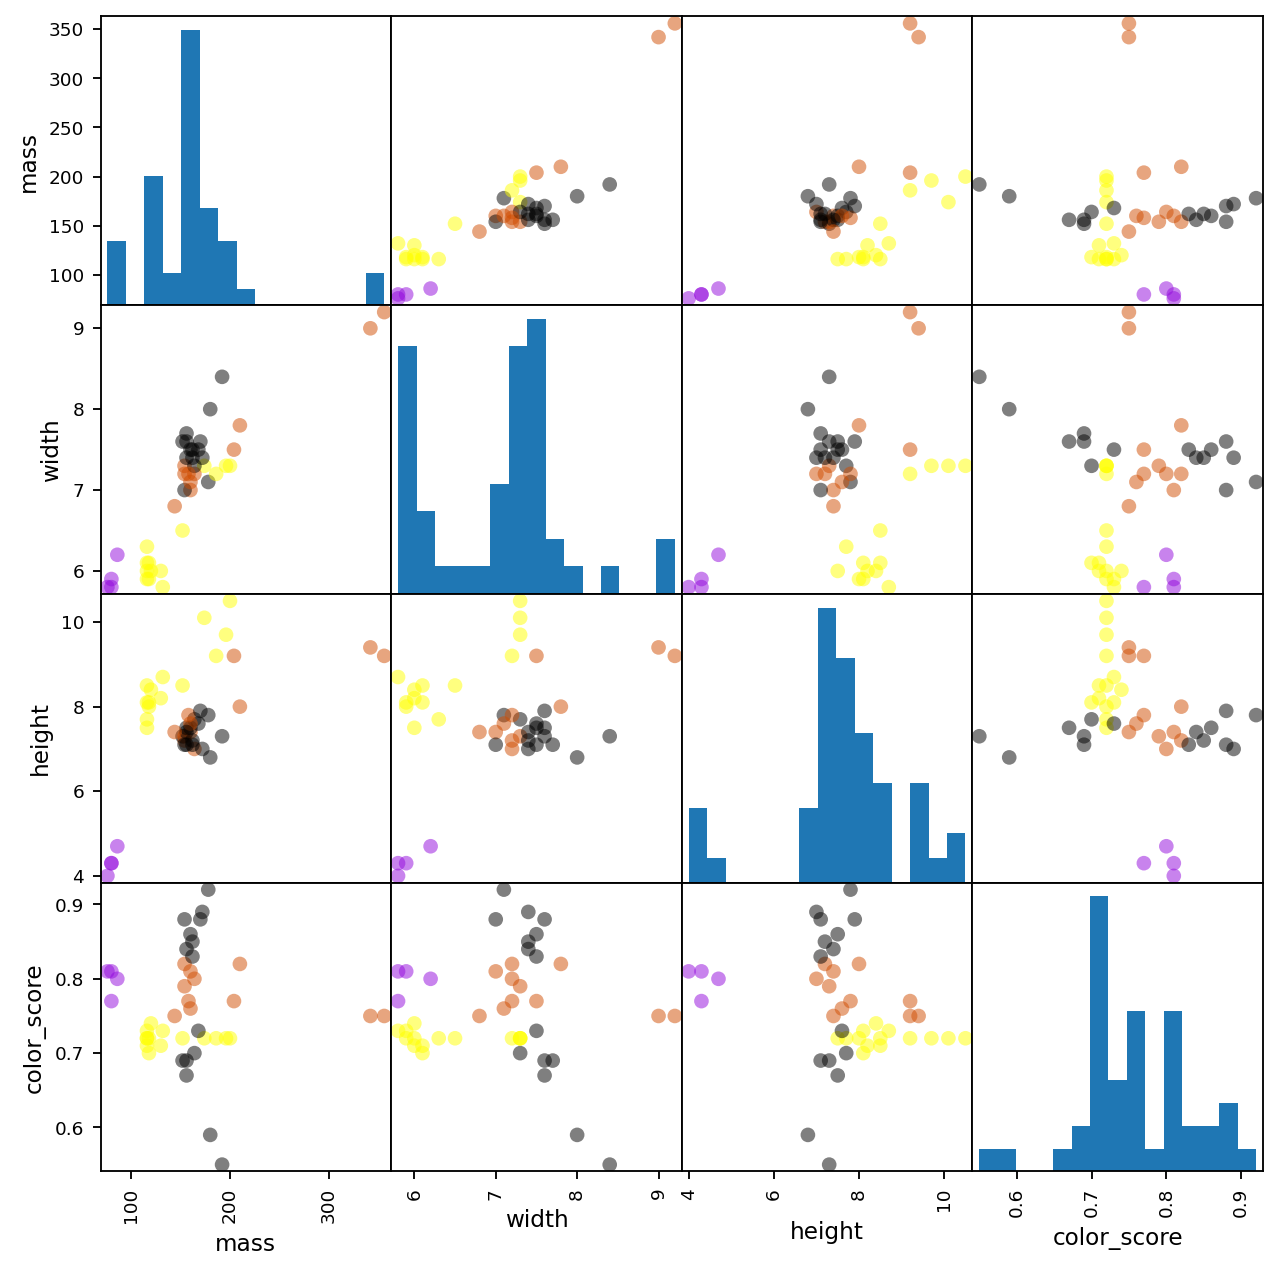

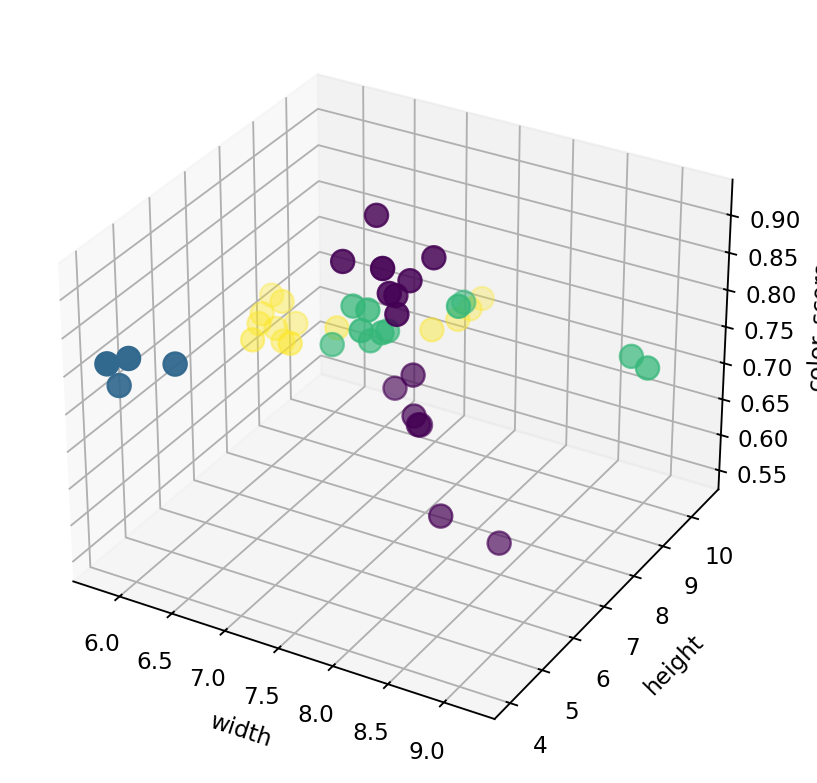

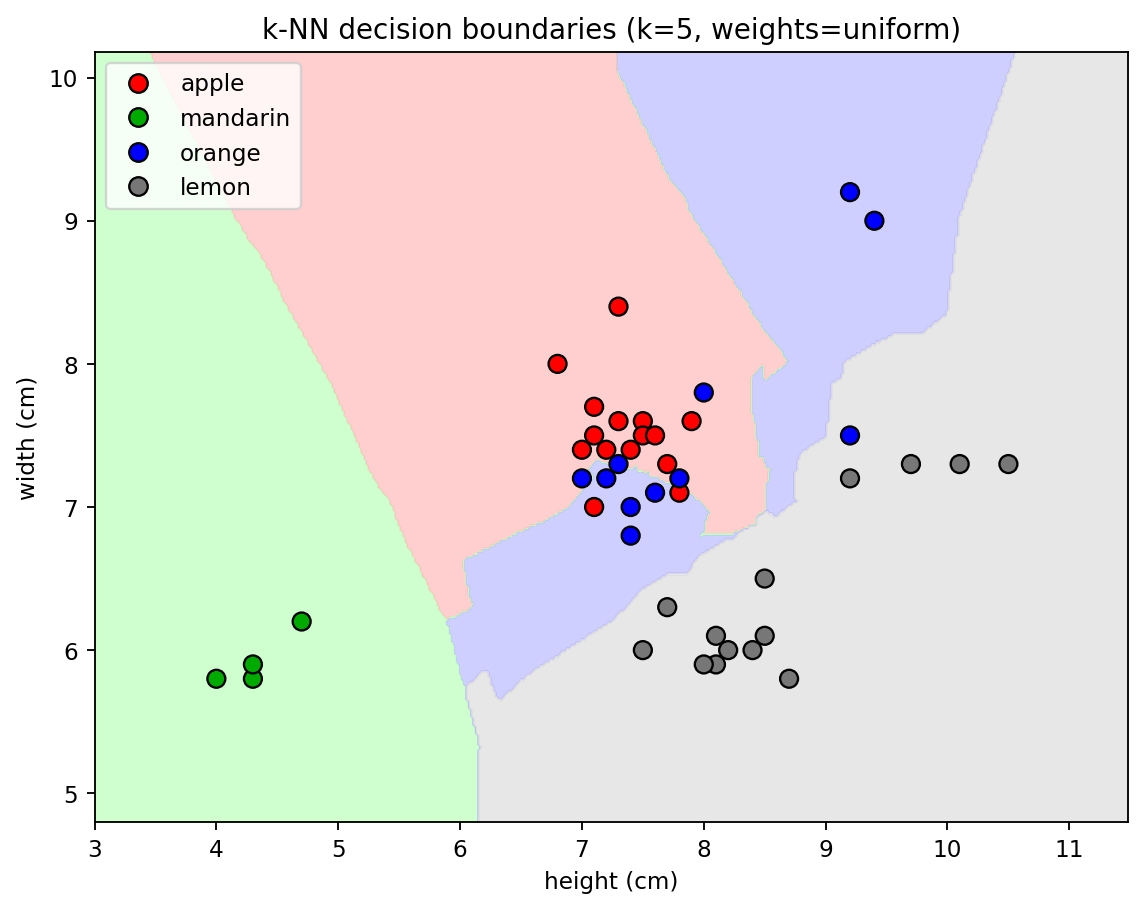

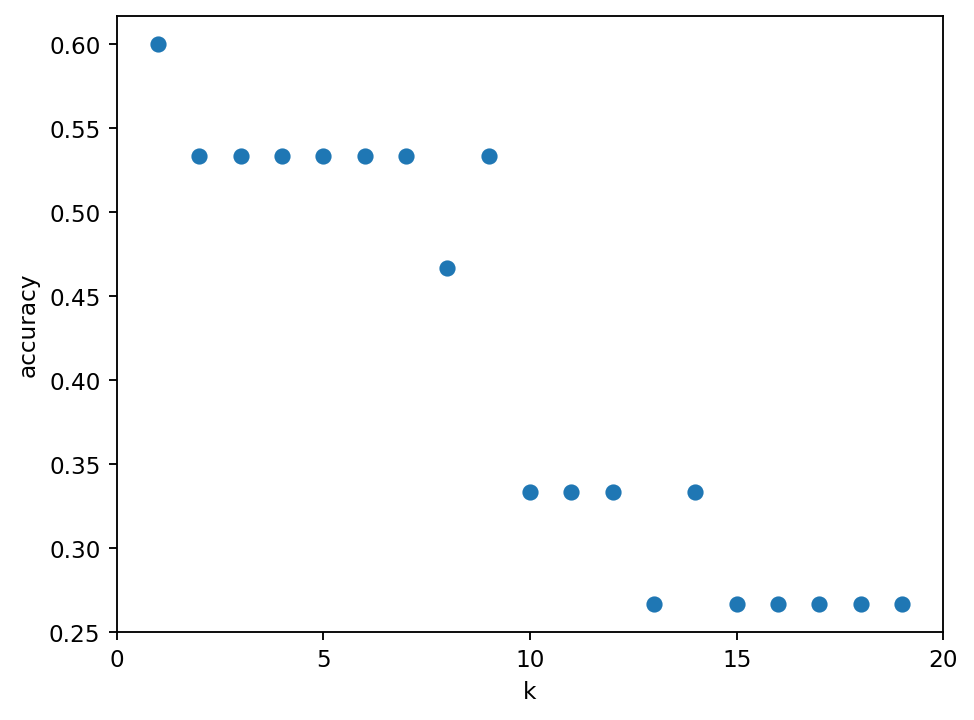

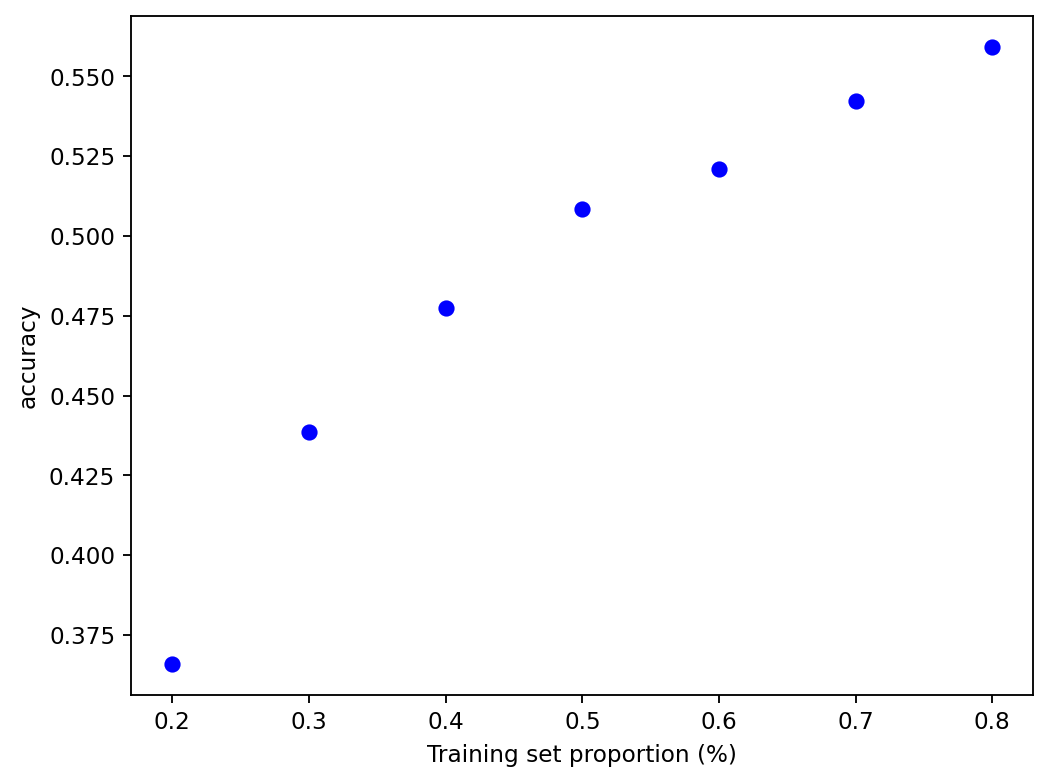

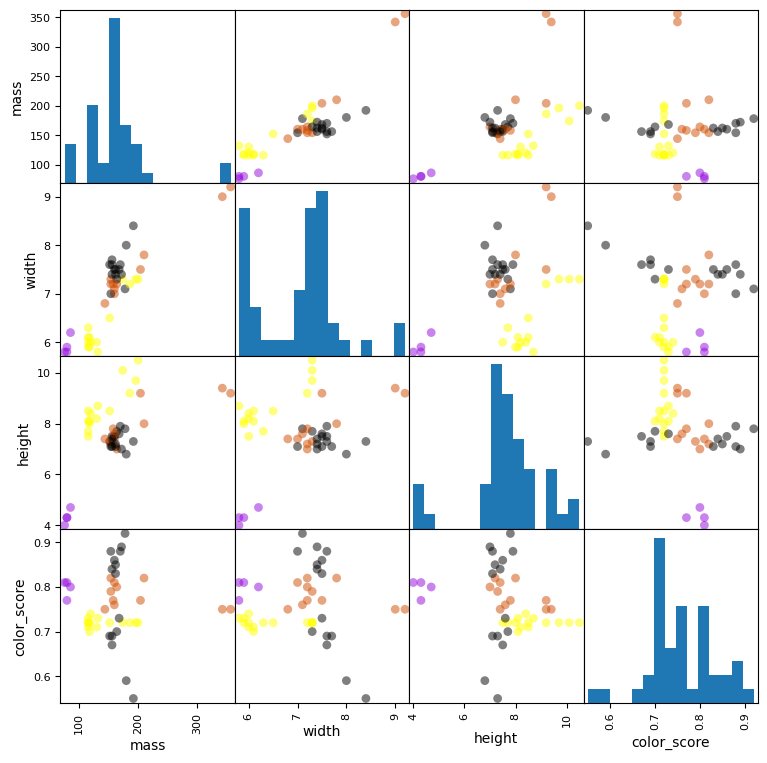

No such comm: 288e13624df8461d96cbb5d2f98ea04a


In [71]:
# plotting a scatter matrix

from matplotlib import cm

X = fruits[['height','width','mass','color_score']]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
plt.tight_layout() 
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker= 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

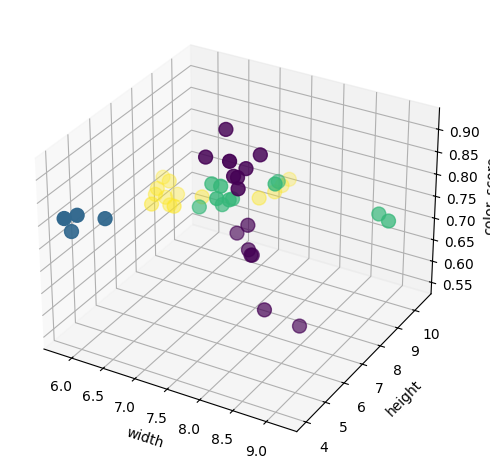

In [72]:
# 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.tight_layout() 
plt.show()

### Create train-test split

In [73]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## The k-Nearest Neighbor (k-NN) Classifier Algorithm

### Given a training set X_train w labels y_train, and given a new instance x_test to be classified:

1. find the most similar instances (X_NN) to x_test that are in X_train.
2. get the labels y_NN for the instances in X_NN
3. predict the label for x_test by combining the labels y_NN


### Create classifier object

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### train the classifier (fit the estimator) using the training data

In [75]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Estimate the accuracy of the classifier on future data, using the test data

In [76]:
knn.score(X_test, y_test)

0.5333333333333333

### use the trained k-NN classifier model to classify new, previosuly unseen objects

In [77]:
# e.g. 1: a fruit w mass 20g, width 4.3 cm, height 5.5 cm

fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]] 

'mandarin'

In [78]:
# e.g. 2: a fruit w mass 100g, width 6.3 cm, height 8.5 cm

fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### plot the decision boundaries of the k-NN classifier

In [79]:
 # pure AI code
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# X: dataframe with at least 'height' and 'width'
# y: labels (fruit_label)
def plot_fruit_knn(X, y, n_neighbors=5, weights='uniform'):
    # use only height and width for 2D decision boundary
    X_plot = X[['height', 'width']].to_numpy()
    y = y.to_numpy()

    # fit k-NN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_plot, y)

    # make a mesh grid over the feature space
    h = 0.02  # step size
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1  # height
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1  # width
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # predict class for each point in the grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # map labels 1..4 → indices 0..3 for colormap
    Z_plot = Z.copy()
    Z_plot[Z == 1] = 0
    Z_plot[Z == 2] = 1
    Z_plot[Z == 3] = 2
    Z_plot[Z == 4] = 3

    # background colors (apple, mandarin, orange, lemon)
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF', '#DDDDDD'])
    # point colors (stronger)
    cmap_bold  = ListedColormap(['#FF0000', '#00AA00', '#0000FF', '#777777'])

    plt.figure(figsize=(8, 6))

    # decision regions
    plt.contourf(xx, yy, Z_plot, cmap=cmap_light, alpha=0.7)

    # training points
    plt.scatter(
        X_plot[:, 0], X_plot[:, 1],
        c=y, cmap=cmap_bold,
        edgecolor='k',
        s=60
    )

    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    # legend using your lookup_fruit_name dict
    # (you already created lookup_fruit_name earlier)
    handles = []
    names = []
    unique_labels = np.sort(np.unique(y))
    for lab in unique_labels:
        handles.append(
            plt.Line2D(
                [], [], marker='o', linestyle='',
                markerfacecolor=cmap_bold(lab-1),
                markeredgecolor='k', markersize=8
            )
        )
        names.append(lookup_fruit_name[lab])
    plt.legend(handles, names, loc='upper left')

    plt.title(f'k-NN decision boundaries (k={n_neighbors}, weights={weights})')
    plt.show()

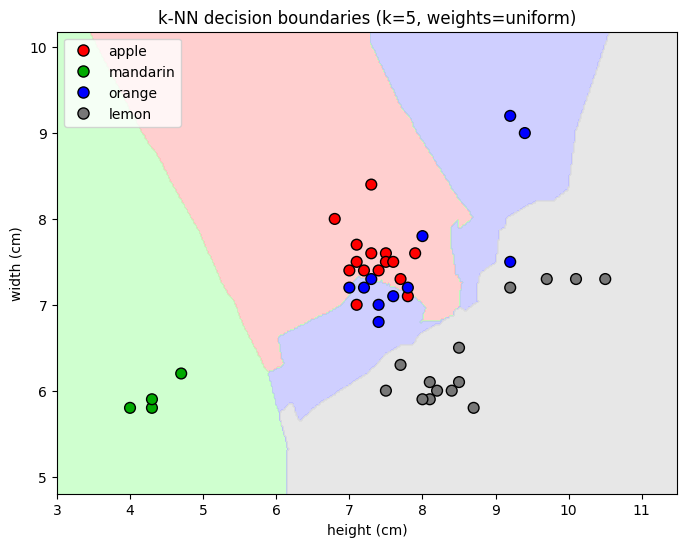

In [80]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

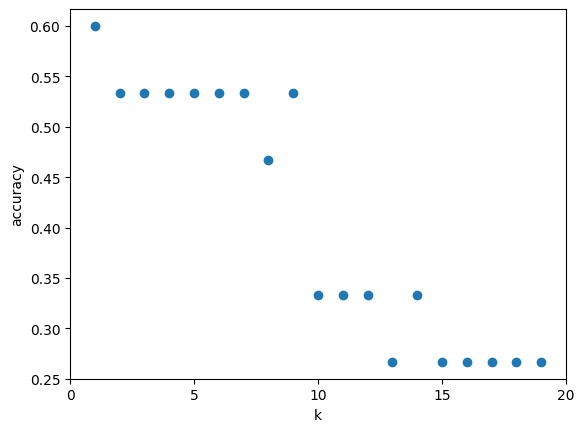

In [81]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

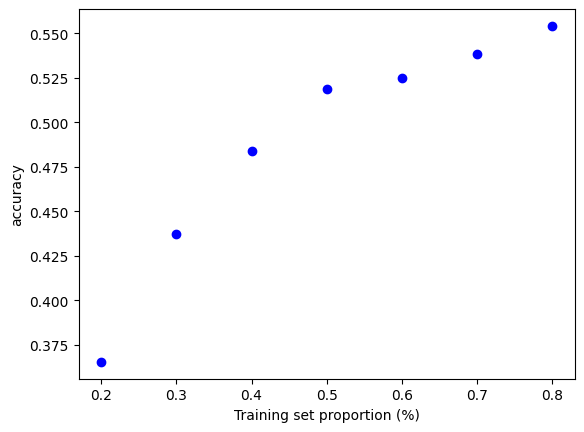

In [82]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# Module 2: Supervised ML Part 1

## Intro to Supervised ML

#### Learning Objectives
- understand how a number of different supervised learning algorithms learn by estimating their parameters from data to make new predictions.
- understand the strengths & weaknesses of particular supervised learning methods.
- learn how to apply specific supervised ML algorithms in Python w scikit-learn.
- learn about general principles of supervised ML learning, like overfitting & how to avoid it.

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)

fruits = pd.read_table('assets/fruit_data_with_colors.txt')

# X_fruits - data instances/samples/examples & y_fruits - target value
feature_names_fruits = ['height','width','mass','color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple','mandarin','orange','lemon']

X_fruits_2D = fruits[['height', 'width']]
y_fruits_2D = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # must apply the scaling to the test set we computed for the training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin
